In [ ]:
#3)COLLECT THE DOUBLES COMPETITOR RANKINGS DATA FROM THE API ENDPOINTS-
https://developer.sportradar.com/tennis/reference/doubles-competitor-rankings

In [ ]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/double_competitors_rankings.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers) #Fetches the data (in JSON format) for doubles competitors rankings
#requests.get() function sends an HTTP GET request to the API at the specified URL, including the defined headers
print(response.text)

{"generated_at":"2025-04-21T17:06:11+00:00","rankings":[{"type_id":2,"name":"ATP","year":2025,"week":17,"gender":"men","competitor_rankings":[{"rank":1,"movement":0,"points":9350,"competitions_played":22,"competitor":{"id":"sr:competitor:49363","name":"Pavic, Mate","country":"Croatia","country_code":"HRV","abbreviation":"PAV"}},{"rank":1,"movement":0,"points":9350,"competitions_played":22,"competitor":{"id":"sr:competitor:51836","name":"Arevalo-Gonzalez, Marcelo","country":"El Salvador","country_code":"SLV","abbreviation":"ARE"}},{"rank":3,"movement":0,"points":7590,"competitions_played":25,"competitor":{"id":"sr:competitor:14898","name":"Heliovaara, Harri","country":"Finland","country_code":"FIN","abbreviation":"HEL"}},{"rank":4,"movement":0,"points":7590,"competitions_played":26,"competitor":{"id":"sr:competitor:637970","name":"Patten, Henry","country":"Great Britain","country_code":"GBR","abbreviation":"PAT"}},{"rank":5,"movement":0,"points":6460,"competitions_played":20,"competitor

In [ ]:
data = response.json() #Converts the API response from JSON format to a Python dictionary

In [ ]:
data['rankings'][0]            #women wta inside that we have ['competitor_rankings']
#Accesses the first item ([0]) from the 'rankings' list in the JSON data.

{'type_id': 2,
 'name': 'ATP',
 'year': 2025,
 'week': 17,
 'gender': 'men',
 'competitor_rankings': [{'rank': 1,
   'movement': 0,
   'points': 9350,
   'competitions_played': 22,
   'competitor': {'id': 'sr:competitor:49363',
    'name': 'Pavic, Mate',
    'country': 'Croatia',
    'country_code': 'HRV',
    'abbreviation': 'PAV'}},
  {'rank': 1,
   'movement': 0,
   'points': 9350,
   'competitions_played': 22,
   'competitor': {'id': 'sr:competitor:51836',
    'name': 'Arevalo-Gonzalez, Marcelo',
    'country': 'El Salvador',
    'country_code': 'SLV',
    'abbreviation': 'ARE'}},
  {'rank': 3,
   'movement': 0,
   'points': 7590,
   'competitions_played': 25,
   'competitor': {'id': 'sr:competitor:14898',
    'name': 'Heliovaara, Harri',
    'country': 'Finland',
    'country_code': 'FIN',
    'abbreviation': 'HEL'}},
  {'rank': 4,
   'movement': 0,
   'points': 7590,
   'competitions_played': 26,
   'competitor': {'id': 'sr:competitor:637970',
    'name': 'Patten, Henry',
    'co

In [ ]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/double_competitors_rankings.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
#Code sends a GET request to the Sportradar API to fetch doubles competitors rankings
#Request is made with an API key for authentication and expects JSON data in response
if response.status_code == 200:       #It checks if the request was successful (HTTP status code 200)
    try:
        data = response.json()        #Converts the JSON response into a Python dictionary for easy manipulation

        ab = []                       #Initializes an empty list ab to store the extracted data
        auto_increment_id = 1         #auto_increment_id is set to 1 for assigning unique IDs to each entry

        #Iterate over rankings to extract the required data
        for ranking in data.get("rankings", []):
            for competitor_ranking in ranking.get("competitor_rankings", []):
                competitor = competitor_ranking.get("competitor", {})
                ab.append({
                    "rank_id": auto_increment_id,
                    "rank": competitor_ranking.get("rank"),
                    "movement": competitor_ranking.get("movement"),
                    "points": competitor_ranking.get("points"),
                    "competitions_played": competitor_ranking.get("competitions_played"),
                    "competitor_id": competitor.get("id"),
                    "name": competitor.get("name"),
                    "country": competitor.get("country"),
                    "week": ranking.get("week"),  # Adjusted to get 'week' from the parent ranking object
                    "country_code": competitor.get("country_code"),
                    "abbreviation": competitor.get("abbreviation"),
                }) 
#Extracts and stores specific data (rank, movement, points, name, country, etc.) into the ab list, with a unique rank_id for each entry
                auto_increment_id += 1 #Increments the ID for the next entry

        #Output the extracted data
        for item in ab:
            print(item)
    except Exception as e:
        print(f"Error processing data: {e}")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


{'rank_id': 1, 'rank': 1, 'movement': 0, 'points': 9350, 'competitions_played': 22, 'competitor_id': 'sr:competitor:49363', 'name': 'Pavic, Mate', 'country': 'Croatia', 'week': 17, 'country_code': 'HRV', 'abbreviation': 'PAV'}
{'rank_id': 2, 'rank': 1, 'movement': 0, 'points': 9350, 'competitions_played': 22, 'competitor_id': 'sr:competitor:51836', 'name': 'Arevalo-Gonzalez, Marcelo', 'country': 'El Salvador', 'week': 17, 'country_code': 'SLV', 'abbreviation': 'ARE'}
{'rank_id': 3, 'rank': 3, 'movement': 0, 'points': 7590, 'competitions_played': 25, 'competitor_id': 'sr:competitor:14898', 'name': 'Heliovaara, Harri', 'country': 'Finland', 'week': 17, 'country_code': 'FIN', 'abbreviation': 'HEL'}
{'rank_id': 4, 'rank': 4, 'movement': 0, 'points': 7590, 'competitions_played': 26, 'competitor_id': 'sr:competitor:637970', 'name': 'Patten, Henry', 'country': 'Great Britain', 'week': 17, 'country_code': 'GBR', 'abbreviation': 'PAT'}
{'rank_id': 5, 'rank': 5, 'movement': 0, 'points': 6460, 'c

In [ ]:
import pandas as pd         #Used for data manipulation and analysis in Python
df=pd.DataFrame(ab)         #ab list, which contains theextracted competitor ranking data, is converted into a pandas DataFrame & allows for easier manipulation and viweing of the data in tabular form
df                          #Displays the DataFrame containing the extracted data

,rank_id,rank,movement,points,competitions_played,competitor_id,name,country,week,country_code,abbreviation
0,1,1,0,9350,22,sr:competitor:49363,"Pavic, Mate",Croatia,17,HRV,PAV
1,2,1,0,9350,22,sr:competitor:51836,"Arevalo-Gonzalez, Marcelo",El Salvador,17,SLV,ARE
2,3,3,0,7590,25,sr:competitor:14898,"Heliovaara, Harri",Finland,17,FIN,HEL
3,4,4,0,7590,26,sr:competitor:637970,"Patten, Henry",Great Britain,17,GBR,PAT
4,5,5,0,6460,20,sr:competitor:87690,"Thompson, Jordan",Australia,17,AUS,THO
...,...,...,...,...,...,...,...,...,...,...,...
995,996,496,4,125,3,sr:competitor:71730,"Kulikov, Angela",USA,17,USA,KUL
996,997,497,-22,125,5,sr:competitor:47969,"Werner, Caroline",Germany,17,DEU,WER
997,998,498,3,125,12,sr:competitor:262701,"Hodzic, Mina",Germany,17,DEU,HOD
998,999,499,32,125,14,sr:competitor:410299,"Cherubini, Diletta",Italy,17,ITA,CHE


In [28]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port=3306
)
cursor = conn.cursor()

In [ ]:
#Creating table for competitor_ranking_table and competitors_table:
cursor.execute("""             #Executes an SQL query using the cursor object, which allows interaction with the MySQL database
    CREATE TABLE IF NOT EXISTS competitor_ranking_table (
            rank_id INT ,       #Defines a column named rank_id that will store integer values     
            ranks INT,          #Defines a column for the competitor's rank, which will also store integer values
            movement INT,       #Defines a column for tracking the competitor's rank movement (also an integer)
            points INT,         #Defines a column to store the points of each competitor (integer values)
            competitions_played INT,  #Defines a column for the number of competitions a competitor has played (integer values)
            competitor_id VARCHAR(255)# Defines a column to store the unique identifier (competitor_id) of each competitor as a string (up to 255 characters)
    )
""")

cursor.execute("""         #Executes the SQL query to create another table
    CREATE TABLE IF NOT EXISTS competitors_table (
        competitor_id VARCHAR(255),  #Defines a column to store the competitor's unique ID as a string
        name VARCHAR(255),           #Defines a column for the competitor's name, storing it as a string
        country VARCHAR(255),        #Defines a column for the competitor's country as a string
        week VARCHAR(50),            #Defines a column for the week, which will store the week of the rankings (string type with a max length of 50)
        country_code VARCHAR(10),    #Defines a column for the competitor's country code (up to 10 characters)
        abbreviation VARCHAR(10)     #Defines a column for the competitor's abbreviation (up to 10 characters).
    )
""")

In [ ]:
#Inserting the data into competitor_ranking_table:
for _, row in df.iterrows():  #Iterates through each row of the DataFrame (df). df.iterrows() returns each row as a pandas Series
    cursor.execute(           #Executes an SQL query to insert data into the competitor_ranking_table
        """
        INSERT INTO competitor_ranking_table (rank_id, ranks , movement, points, competitions_played, competitor_id)
        VALUES (%s, %s, %s, %s, %s, %s) #Placeholder values that are substituted by the values from the current row. (%s) are used for parameterized queries to prevent SQL injection.
        """,
        (row["rank_id"], row["rank"], row["movement"], row["points"], row["competitions_played"], row["competitor_id"])
    )

#row["rank_id"]: The rank_id from the DataFrame
#row["rank"]: The rank value
#row["movement"]: The movement of the rank
#row["points"]: The points of the competitor
#row["competitions_played"]: The number of competitions the competitor has played
#row["competitor_id"]: The competitor's unique ID

#Create competitors_df with unique competitors
competitors_df = df.drop_duplicates(subset="competitor_id")[["competitor_id", "name", "country","week", "country_code", "abbreviation"]]

for _, row in df.iterrows():
    cursor.execute(
        """
        INSERT IGNORE INTO competitors_table (competitor_id, name, country, week, country_code, abbreviation)
        VALUES (%s, %s, %s, %s,%s, %s)
        """,
        (row["competitor_id"], row["name"], row["country"],row["week"],row["country_code"], row["abbreviation"])
    )

#row["competitor_id"]: The competitor's unique ID
#row["name"]: The competitor's name
#row["country"]: The competitor's country
#row["week"]: The week of the ranking
#row["country_code"]: The country code
#row["abbreviation"]: The competitor's abbreviation

#Commit changes and close the database connection
conn.commit() #Commits the changes to the database, making the inserts permanent
cursor.close() #Closes the cursor, which is no longer needed after the operations
conn.close()  #Closes the database connection, ensuring that resources are released

In [3]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port = 3306
)
cursor = conn.cursor()

In [4]:
from tabulate import tabulate

In [ ]:
#1)Get all competitors with their rank and points

cursor.execute(        #Executes the SQL query on the MySQL database
    '''select a.competitor_id,ranks,points 
       from competitor_ranking_table a join competitors_table b
       on a.competitor_id = b.competitor_id limit 100
    '''             
)

#from competitor_ranking_table a: Specifies that data is being selected from the competitor_ranking_table, and it's aliased as a for easier reference.
#join competitors_table b: Joins the competitor_ranking_table (a) with the competitors_table (b) based on a matching competitor_id.
#on a.competitor_id = b.competitor_id: Defines the join condition, where the competitor_id in both tables must match

results = cursor.fetchall() #Fetches all the rows returned by the executed query, and the results are stored in the result variable.
headers = ["competitor_id", "ranks","points"] #Defines the column names for the table that will be displayed
table = tabulate(results, headers, tablefmt="grid") #Neatly structured table with a "grid" format, headers --> produce a readable table o/p

print(table)

+----------------------+---------+----------+
| competitor_id        |   ranks |   points |
+======================+=========+==========+
| sr:competitor:49363  |       1 |     9350 |
+----------------------+---------+----------+
| sr:competitor:49363  |       1 |     9350 |
+----------------------+---------+----------+
| sr:competitor:51836  |       1 |     9350 |
+----------------------+---------+----------+
| sr:competitor:51836  |       1 |     9350 |
+----------------------+---------+----------+
| sr:competitor:14898  |       3 |     7590 |
+----------------------+---------+----------+
| sr:competitor:14898  |       3 |     7590 |
+----------------------+---------+----------+
| sr:competitor:637970 |       4 |     7590 |
+----------------------+---------+----------+
| sr:competitor:637970 |       4 |     7590 |
+----------------------+---------+----------+
| sr:competitor:87690  |       5 |     6460 |
+----------------------+---------+----------+
| sr:competitor:87690  |       5 |

In [ ]:
#plt.figure() --> It's like opening a new blank sheet for a new plot.
#plt.bar()    --> Used to visually compare quantities using bars.
#plt.xlabel --> Helps the viewer know what the x-axis values represent
#plt.ylabel --> Gives meaning to the height or value of bars/lines
#plt.title  --> Gives a clear description of what the chart is about
#plt.xticks --> Used for better readability of x-axis labels. (.xticks() customizes the appearance or positioning of tick marks and labels on the x-axis. It helps improve readability)
#plt.tight_layout --> Automatically fixes layout issues for cleaner presentation
#plt.show   --> It’s the final command that tells Python to render the chart
#ha         --> Horizontal alignment 
#plt.gca().invert_yaxis() 
   #plt.gca() - get current axes - It return the current axes object in the plot
   #.invert_yaxis() - Inverts the direction of the y-axis — making higher values appear lower and lower values appear at the top

[('sr:competitor:49363', 1, 9350), ('sr:competitor:51836', 1, 9350), ('sr:competitor:14898', 3, 7590), ('sr:competitor:637970', 4, 7590), ('sr:competitor:87690', 5, 6460)]


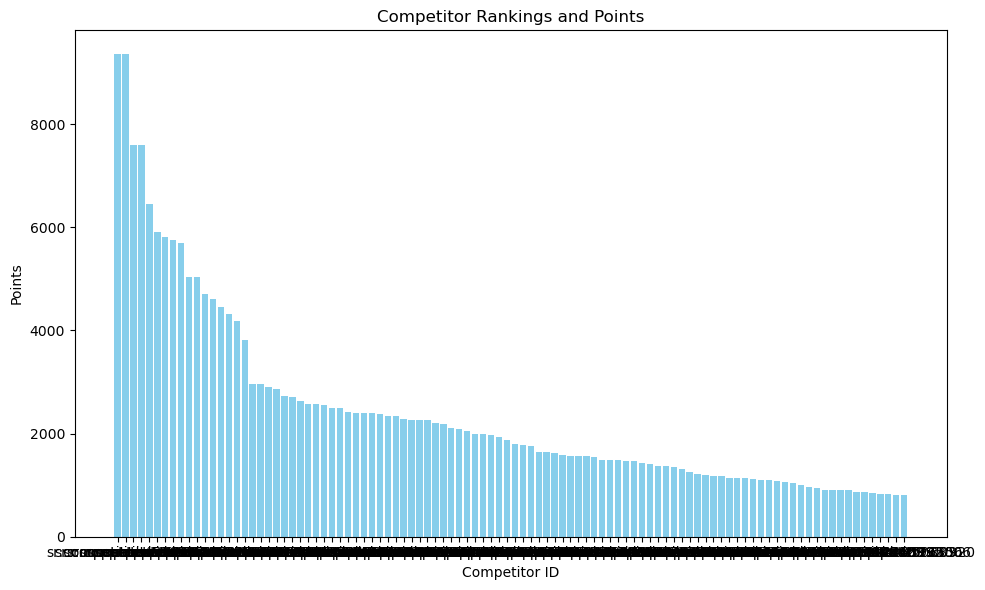

In [12]:
#1)Get all competitors with their rank and points

import matplotlib.pyplot as plt

#SQL query to get competitors with rank and points
cursor.execute('''
    SELECT a.competitor_id, a.ranks, a.points
    FROM competitor_ranking_table a
    JOIN competitors_table b ON a.competitor_id = b.competitor_id
    LIMIT 100;
''')

results = cursor.fetchall()

#Check the first few rows of results to ensure it's fetched properly
print(results[:5])

#Prepare the data for plotting
competitor_ids = [row[0] for row in results]
ranks = [row[1] for row in results]
points = [row[2] for row in results]

#Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(competitor_ids, points, color='skyblue')
plt.xlabel('Competitor ID')
plt.ylabel('Points')
plt.title('Competitor Rankings and Points')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#2)Find competitors ranked in the top 5
cursor.execute(
    '''select competitor_id,ranks from competitor_ranking_table order by ranks limit 5

    '''             
) 
#Orders the results in ascending order based on the ranks column - Competitors with the lowest rank numbers (i.e., highest rankings) come first
results = cursor.fetchall()
headers = ["competitor_id", "ranks"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------------+---------+
| competitor_id       |   ranks |
+=====================+=========+
| sr:competitor:49363 |       1 |
+---------------------+---------+
| sr:competitor:51836 |       1 |
+---------------------+---------+
| sr:competitor:72376 |       1 |
+---------------------+---------+
| sr:competitor:51387 |       2 |
+---------------------+---------+
| sr:competitor:14898 |       3 |
+---------------------+---------+


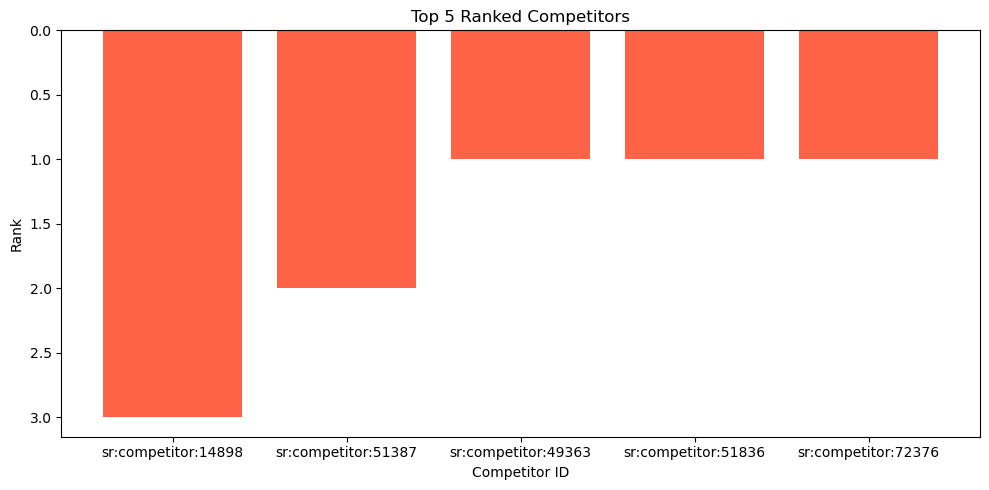

In [ ]:
#Optional: 2)Find competitors ranked in the top 5
#Convert SQL result to DataFrame
df = pd.DataFrame(results, columns=["competitor_id", "ranks"])

#Optional: Reverse rank order for better visualization (rank 1 on top)
df = df.sort_values("ranks", ascending=False)

#Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(df["competitor_id"], df["ranks"], color='tomato')
plt.title("Top 5 Ranked Competitors")
plt.xlabel("Competitor ID")
plt.ylabel("Rank") #Why We Invert the Y-Axis: Since rank 1 is better than rank 5, inverting the y-axis gives a clearer visual hierarchy.
plt.gca().invert_yaxis()  #Lower ranks (1 is top) appear higher
plt.tight_layout()
plt.show()

#Flips the y-axis so that high values appear at the bottom and low values at the top — useful in ranking or reverse-sorted plots.

In [ ]:
#3)List competitors with no rank movement (stable rank)
cursor.execute(
    '''select competitor_id,movement from competitor_ranking_table where movement = 0

    '''             
)
#Filters the results to only include rows where the movement value is 0. 
#Movement of 0 indicates that the competitor's rank has not changed (they have a stable rank)
results = cursor.fetchall()
headers = ["competitor_id", "movement"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+----------------------+------------+
| competitor_id        |   movement |
+======================+============+
| sr:competitor:49363  |          0 |
+----------------------+------------+
| sr:competitor:51836  |          0 |
+----------------------+------------+
| sr:competitor:14898  |          0 |
+----------------------+------------+
| sr:competitor:637970 |          0 |
+----------------------+------------+
| sr:competitor:87690  |          0 |
+----------------------+------------+
| sr:competitor:15568  |          0 |
+----------------------+------------+
| sr:competitor:16160  |          0 |
+----------------------+------------+
| sr:competitor:124658 |          0 |
+----------------------+------------+
| sr:competitor:16608  |          0 |
+----------------------+------------+
| sr:competitor:59131  |          0 |
+----------------------+------------+
| sr:competitor:108099 |          0 |
+----------------------+------------+
| sr:competitor:16151  |          0 |
+-----------

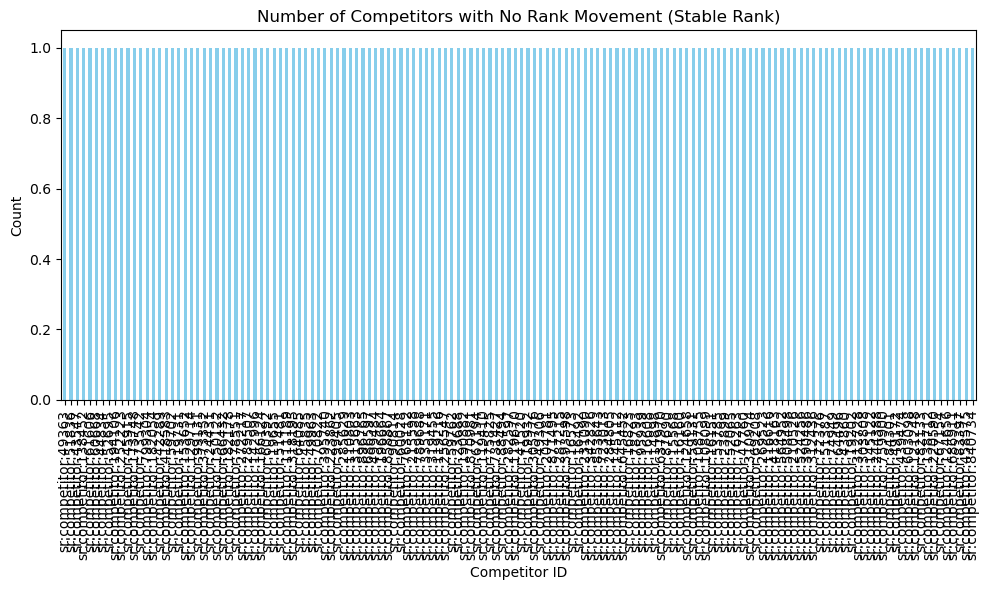

In [16]:
#Optional: 3)List competitors with no rank movement (stable rank)
#Query competitors with no rank movement (movement = 0)

#Convert the results into a DataFrame for plotting
df = pd.DataFrame(results, columns=["competitor_id", "movement"])

#Plotting the bar graph: Count of competitors with no movement
competitors_no_movement = df["competitor_id"].value_counts()

#Plot the bar graph
plt.figure(figsize=(10, 6))
competitors_no_movement.plot(kind='bar', color='skyblue')
plt.title('Number of Competitors with No Rank Movement (Stable Rank)')
plt.xlabel('Competitor ID')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate competitor IDs for better readability
plt.tight_layout()  # Adjust layout to avoid clipping labels
plt.show()

# Close the cursor and connection after finishing the operations
cursor.close()
conn.close()

In [ ]:
#4)Get the total points of competitors from a specific country (e.g., Croatia)

cursor.execute(
    '''select sum(points) as total_points,country from competitor_ranking_table a
join competitors_table b on a.competitor_id = b.competitor_id
group by country
having country = "Croatia"
    '''             
)
#select sum(points) as total_points, country --> Selects the sum of the points column, which represents the total points of competitors from a specific country
#sum is aliased as total_points --> Also, selects the country column
#from competitor_ranking_table a --> Specifies the competitor_ranking_table (aliased as a) from which the data will be retrieved
#join competitors_table b on a.competitor_id = b.competitor_id --> Joins the competitor_ranking_table (a) with the competitors_table (b) on the competitor_id field. Allows - Access the country field from the competitors_table
#group by country --> Groups the results by the country field. Query will calculate the total points for each country
#having country = "Croatia" 
    #Filters the results to only include the total points for the country "Croatia"
    #HAVING Clause - Used --> Working with an Aggregate () (sum(points))
    #WHERE --> Can't be used to filter on aggregates



results = cursor.fetchall()
headers = ["total_points", "country"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+----------------+-----------+
|   total_points | country   |
+================+===========+
|          16764 | Croatia   |
+----------------+-----------+


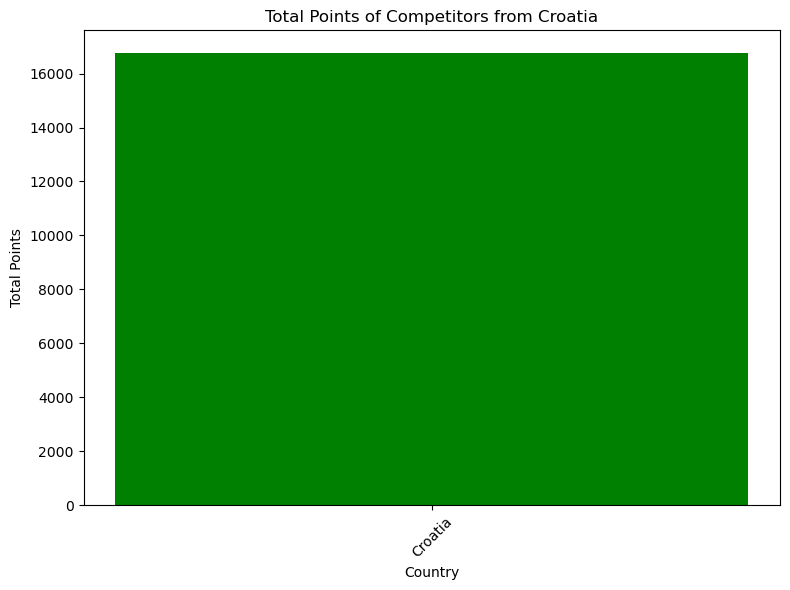

In [25]:
#Optional: 4)Get the total points of competitors from a specific country (e.g., Croatia)

# Convert the results into a DataFrame for plotting
df = pd.DataFrame(results, columns=["total_points", "country"])

# Plotting the bar graph for total points of competitors from Croatia
plt.figure(figsize=(8, 6))
plt.bar(df["country"], df["total_points"], color='green')
plt.title('Total Points of Competitors from Croatia')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the cursor and connection after finishing the operations
cursor.close()
conn.close()

In [ ]:
#5)Count the number of competitors per country
cursor.execute(  #Executes the SQL query on the MySQL database
    '''select count(b.competitor_id) as total_competitors,country from competitor_ranking_table a
join competitors_table b on a.competitor_id = b.competitor_id
group by country
    '''             
)

#select count(b.competitor_id) as total_competitors, country --> Query selects the count of the competitor_id from the competitors_table (aliased as b) for each country
#Result --> Aliased as total_competitors, also selects the country column

#from competitor_ranking_table a --> Specifies the competitor_ranking_table (aliased as a) from which the data will be retrieved

#join competitors_table b on a.competitor_id = b.competitor_id --> Joins the competitor_ranking_table (a) with the competitors_table (b) on the competitor_id field, allowing access to the country field from the competitors_table

#group by country --> Groups the results by the country field - Ensures that the count is calculated separately for each country

results = cursor.fetchall()
headers = ["total_competitors", "country"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------------+--------------------------+
|   total_competitors | country                  |
+=====================+==========================+
|                   4 | Algeria                  |
+---------------------+--------------------------+
|                   4 | Antigua and Barbuda      |
+---------------------+--------------------------+
|                 124 | Argentina                |
+---------------------+--------------------------+
|                   4 | Armenia                  |
+---------------------+--------------------------+
|                 188 | Australia                |
+---------------------+--------------------------+
|                  48 | Austria                  |
+---------------------+--------------------------+
|                   4 | Belarus                  |
+---------------------+--------------------------+
|                  48 | Belgium                  |
+---------------------+--------------------------+
|                  16 | Bolivia

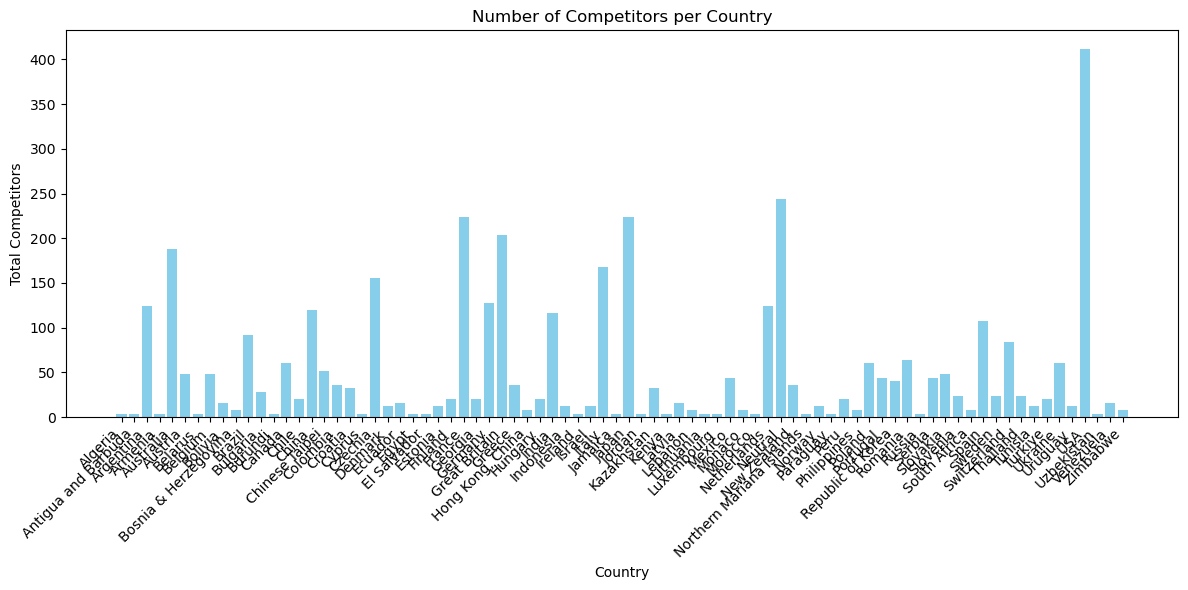

In [34]:
#Optional: 5)Count the number of competitors per country
df = pd.DataFrame(results, columns=headers)
#Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["country"], df["total_competitors"], color='skyblue')
plt.title("Number of Competitors per Country")
plt.xlabel("Country")
plt.ylabel("Total Competitors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#6)Find competitors with the highest points in the current week
cursor.execute(
    '''select max(points) as highest_points , week as current_week from competitors_table a join competitor_ranking_table b
on a.competitor_id =b.competitor_id
group by current_week
    '''             
)

#select max(points) as highest_points, week as current_week
  #Selects the maximum value of the points column for each week, maximum points value is aliased as highest_points, it also selects the week column, which is aliased as current_week.

#from competitors_table a --> Specifies the competitors_table (aliased as a) from which the data will be retrieved

#join competitor_ranking_table b on a.competitor_id = b.competitor_id
  #Joins the competitors_table (a) with the competitor_ranking_table (b) on the competitor_id field. This allows access to both the week and points columns

#group by current_week --> Groups the results by the week column --> max(points) function will calculate the highest points for each week

results = cursor.fetchall()
headers = ["highest_points", "current_week"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+------------------+----------------+
|   highest_points |   current_week |
+==================+================+
|            10665 |             17 |
+------------------+----------------+


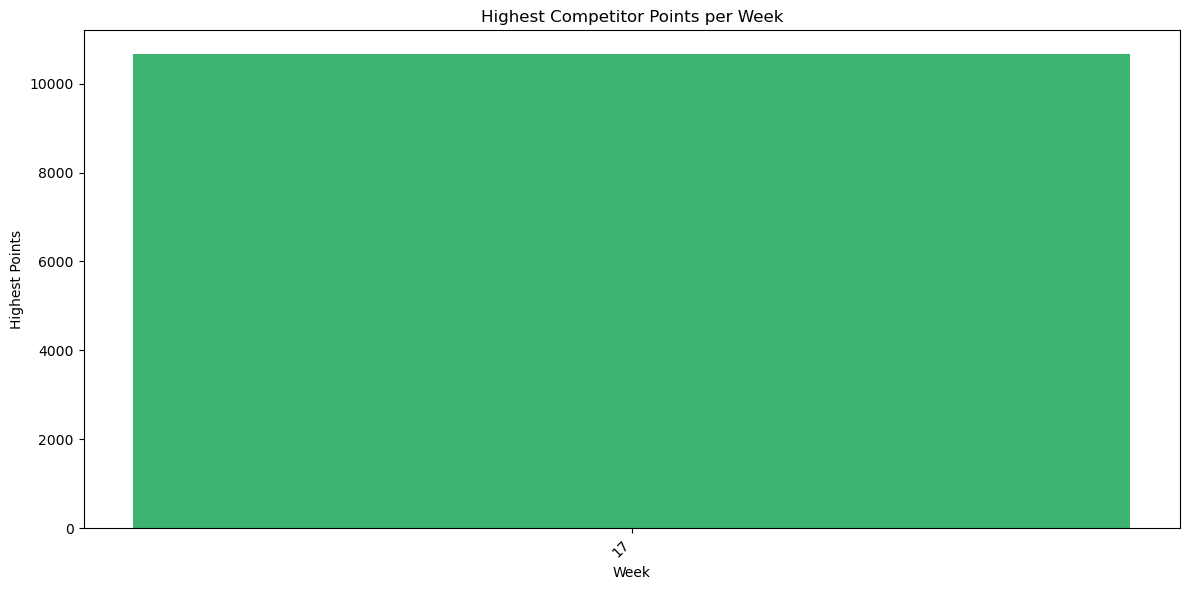

In [36]:
#Optional: 6)Find competitors with the highest points in the current week
#Convert SQL result to DataFrame
df = pd.DataFrame(results, columns=["highest_points", "current_week"])

#Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["current_week"], df["highest_points"], color='mediumseagreen')
plt.title("Highest Competitor Points per Week")
plt.xlabel("Week")
plt.ylabel("Highest Points")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()